In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [4]:
os.chdir('C:\\Users\\bored\\Music\\MY_OWN')

In [5]:
from src.datascience.constants import *
from sklearn.model_selection import train_test_split


In [6]:
from src.datascience.utils.common import *

In [7]:
config=read_yaml(CONFIG_FILE_PATH)

[2024-12-03 15:49:28,931 : INFO : common : YAML file C:\Users\bored\Music\My_own\config\config.yaml is loaded safely]


In [8]:
print(config.data_ingestion.local_data_file)

artifacts/data_ingestion/data.csv


In [9]:
import os
print(os.path.exists(config.data_ingestion.local_data_file))


True


In [10]:
os.chdir('C:\\Users\\bored\\Music\\MY_OWN')

In [11]:
%pwd

'C:\\Users\\bored\\Music\\MY_OWN'

In [12]:
data=pd.read_csv('C:/Users/bored/Music/My_own/artifacts/data_ingestion/data.csv')

In [13]:
data.head()

,Unnamed: 0,beds,baths,size,zip_code,price
0,0,3,2.5,2590.0,98144,795000.0
1,1,4,2.0,2240.0,98106,915000.0
2,2,4,3.0,2040.0,98107,950000.0
3,3,4,3.0,3800.0,98199,1950000.0
4,4,2,2.0,1042.0,98102,950000.0


In [14]:
data.reset_index(drop=True,inplace=True)

In [15]:
data.head()

,Unnamed: 0,beds,baths,size,zip_code,price
0,0,3,2.5,2590.0,98144,795000.0
1,1,4,2.0,2240.0,98106,915000.0
2,2,4,3.0,2040.0,98107,950000.0
3,3,4,3.0,3800.0,98199,1950000.0
4,4,2,2.0,1042.0,98102,950000.0


In [16]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
data.head()

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0


In [18]:
train,test=train_test_split(data,train_size=0.8,random_state=42)

In [19]:
X=data.drop(columns=['price'])

In [20]:
X

,beds,baths,size,zip_code
0,3,2.5,2590.0,98144
1,4,2.0,2240.0,98106
2,4,3.0,2040.0,98107
3,4,3.0,3800.0,98199
4,2,2.0,1042.0,98102
...,...,...,...,...
2011,3,2.0,1370.0,98112
2012,1,1.0,889.0,98121
2013,4,2.0,2140.0,98199
2014,2,2.0,795.0,98103


In [21]:
Y=data['price']

In [22]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
import seaborn as sns

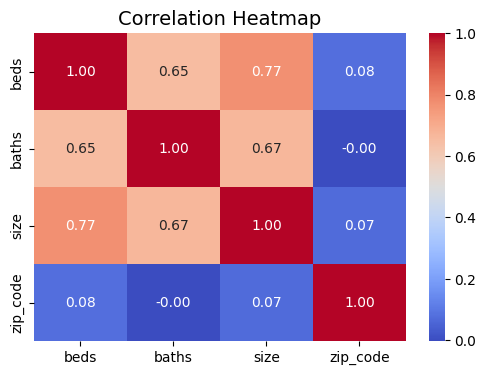

In [24]:
plt.figure(figsize=(6, 4))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [25]:
os.chdir('C:\\Users\\bored\\Music\\MY_OWN')

In [26]:
save_file(train,config.data_transform.train_path)

[2024-12-03 15:49:29,562 : INFO : common : File saved successfully at artifacts/data_transform/train.csv]


In [27]:
%pwd

'C:\\Users\\bored\\Music\\MY_OWN'

In [28]:
save_file(test,config.data_transform.test_path)

[2024-12-03 15:49:29,604 : INFO : common : File saved successfully at artifacts/data_transform/test.csv]


In [29]:
data.head()

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0


In [30]:
train,test=train_test_split(data,train_size=0.8)

In [31]:
train.isnull()

,beds,baths,size,zip_code,price
83,False,False,False,False,False
141,False,False,False,False,False
1456,False,False,False,False,False
377,False,False,False,False,False
432,False,False,False,False,False
...,...,...,...,...,...
547,False,False,False,False,False
1050,False,False,False,False,False
1255,False,False,False,False,False
328,False,False,False,False,False


In [32]:
test.head()

,beds,baths,size,zip_code,price
101,1,1.0,756.0,98121,550000.0
817,1,1.0,562.0,98199,285000.0
1988,4,2.0,2080.0,98116,1098000.0
580,5,4.0,4490.0,98122,1150000.0
1980,1,1.0,865.0,98112,712500.0


In [33]:
train.isnull().sum()

beds        0
baths       0
size        0
zip_code    0
price       0
dtype: int64

In [34]:
X_train=train.drop(columns=['price'])
Y_train=train['price']

In [35]:
x_test=test.drop(columns=['price'])
y_test=test['price']

In [36]:
from sklearn.model_selection import RandomizedSearchCV


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


In [38]:
param_grid = {
    'scaler__with_mean': [True, False],  # Parameter for StandardScaler
    'regressor__fit_intercept': [True, False],  # Parameter for LinearRegression
}


In [39]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # First step: Scaling the data
    ('regressor', LinearRegression())  # Second step: Linear regression model
])


In [40]:
linear=LinearRegression()
cv=StratifiedKFold()


In [41]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipeline,  # Pipeline as the estimator
    param_distributions=param_grid,  # Hyperparameter grid
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # Number of cross-validation folds
    scoring='r2',  # Scoring metric for regression (R-squared here)
    random_state=42,
    n_jobs=-1  # Use all available cores
)


In [42]:
random_search.fit(X_train, Y_train)


c:\Users\bored\Music\My_own\myown\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('regressor',
                                              LinearRegression())]),
                   n_jobs=-1,
                   param_distributions={'regressor__fit_intercept': [True,
                                                                     False],
                                        'scaler__with_mean': [True, False]},
                   random_state=42, scoring='r2')

In [43]:
random_search.best_params_

{'scaler__with_mean': False, 'regressor__fit_intercept': True}

In [44]:
random_search.best_score_

np.float64(0.5184323993750409)

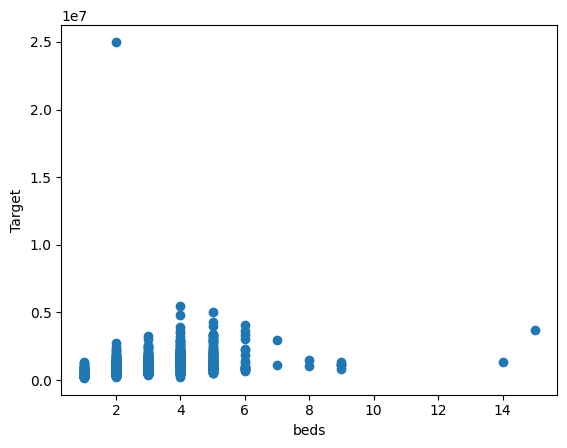

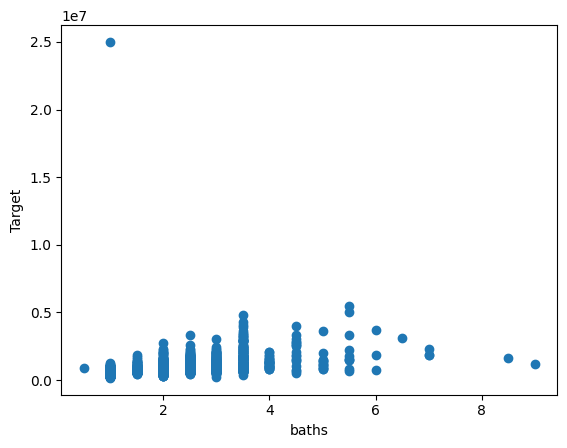

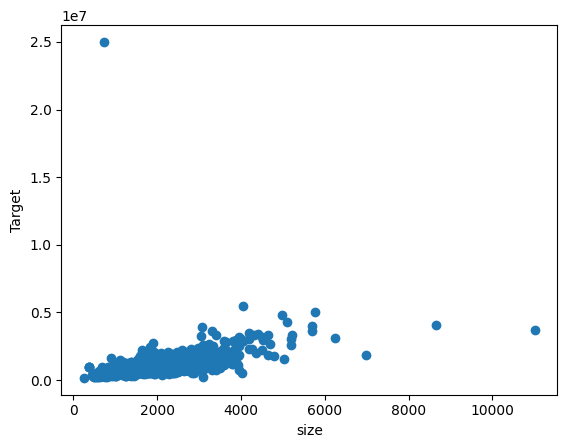

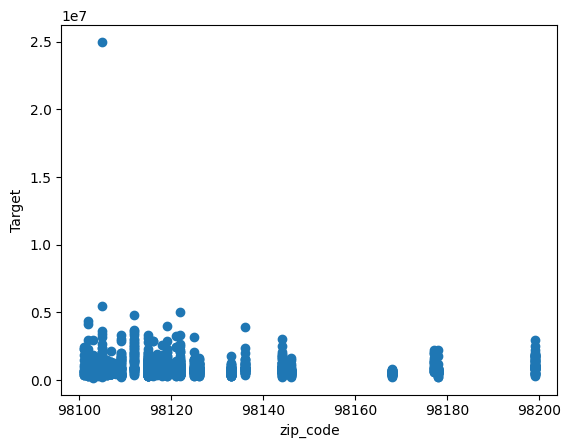

In [45]:
import matplotlib.pyplot as plt
for col in X_train.columns:
    plt.scatter(X_train[col], Y_train)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.show()


In [46]:
from xgboost import XGBRegressor


In [47]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('regressor', XGBRegressor())  # XGBoost as the regression model
])


In [48]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200],  # Number of trees
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Step size for updating weights
    'regressor__max_depth': [3, 5, 7],  # Maximum depth of a tree
    'regressor__subsample': [0.6, 0.8, 1.0],  # Fraction of samples for training each tree
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'regressor__reg_alpha': [0, 0.1, 1],  # L1 regularization
    'regressor__reg_lambda': [1, 5, 10],  # L2 regularization
}


In [49]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,  # Cross-validation folds
    scoring='r2',  # Use R^2 as the evaluation metric
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [50]:
random_search.fit(X_train, Y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=None,
                                                           importa...
                                                           random_state=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'regressor__colsample_bytree': [0.6,
                                                                        0.8,
                                                                        1.0],
                                        'regressor__learning_rate': [0.01, 0.1,
                                                                     0.2],
                                        'regressor__max_depth': [3, 5, 7],
                                        'regressor__n_estimators': [50, 100,
                                                                    200],
                                        'regressor__reg_alpha': [0, 0.1, 1],
                                        'regressor__reg_lambda': [1, 5, 10],
                                        'regressor__subsample': [0.6, 0.8,
                                                                 1.0]},
                   random_state=42, scoring='r2')

In [51]:


# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best R^2 Score:", random_search.best_score_)


Best Parameters: {'regressor__subsample': 0.6, 'regressor__reg_lambda': 10, 'regressor__reg_alpha': 0.1, 'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.8}
Best R^2 Score: 0.577559027765526


<Axes: xlabel='price', ylabel='Count'>

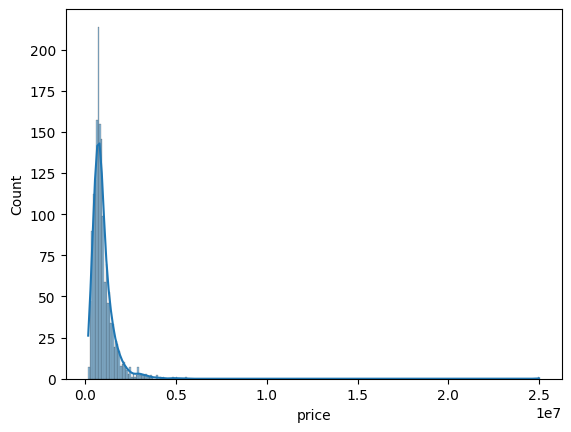

In [52]:
import seaborn as sns
sns.histplot(Y_train, kde=True)


In [53]:
import numpy as np
y_train_log = np.log1p(Y_train)  # Apply log transformation
y_test_log = np.log1p(y_test)    # Ensure consistency for test data


<Axes: xlabel='price', ylabel='Count'>

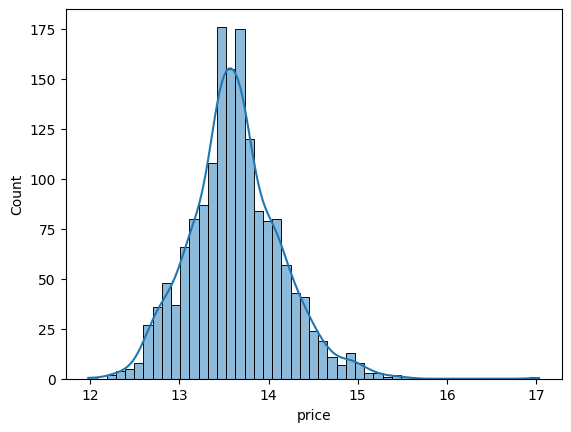

In [54]:
sns.histplot(y_train_log, kde=True)

In [55]:
random_search.fit(X_train, y_train_log)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=None,
                                                           importa...
                                                           random_state=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'regressor__colsample_bytree': [0.6,
                                                                        0.8,
                                                                        1.0],
                                        'regressor__learning_rate': [0.01, 0.1,
                                                                     0.2],
                                        'regressor__max_depth': [3, 5, 7],
                                        'regressor__n_estimators': [50, 100,
                                                                    200],
                                        'regressor__reg_alpha': [0, 0.1, 1],
                                        'regressor__reg_lambda': [1, 5, 10],
                                        'regressor__subsample': [0.6, 0.8,
                                                                 1.0]},
                   random_state=42, scoring='r2')

In [56]:
random_search.best_score_

np.float64(0.7465340648248272)

In [57]:
y_pred_log = random_search.best_estimator_.predict(x_test)
y_pred = np.expm1(y_pred_log)  


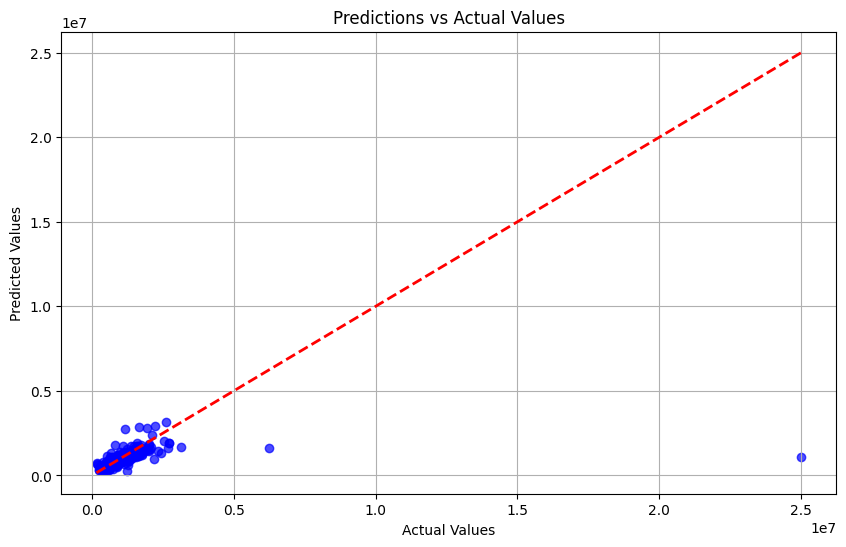

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the actual and predicted values (after reversing the log transformation)
# Replace `y_test` and `y_pred` with your actual data
y_test_original = np.expm1(y_test_log)  # Reverse log transformation of actual test data
y_pred_original = np.expm1(y_pred_log)  # Reverse log transformation of predicted data

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.7, color='blue')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linewidth=2, linestyle="--")
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


<Axes: xlabel='price', ylabel='Count'>

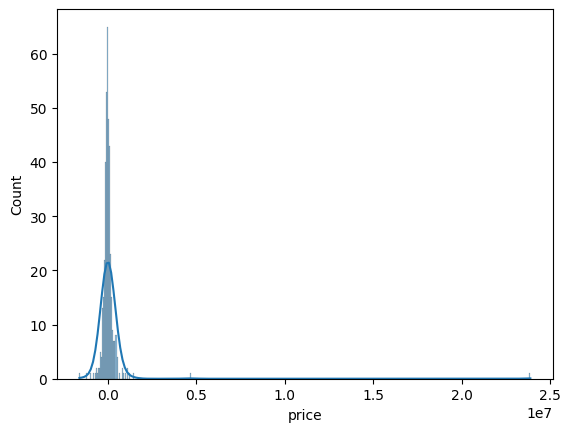

In [59]:
residuals = y_test_original - y_pred_original
sns.histplot(residuals, kde=True)


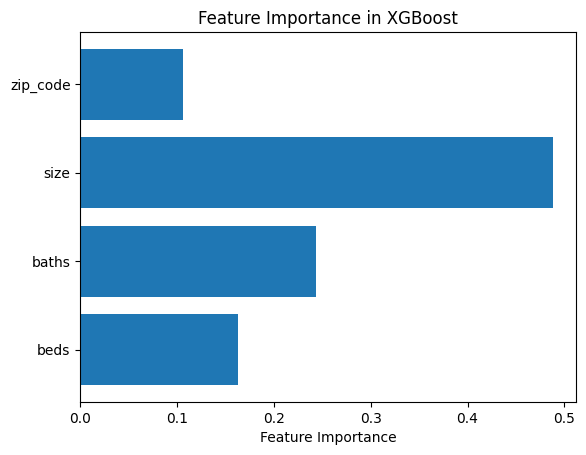

In [60]:
importance = random_search.best_estimator_.named_steps['regressor'].feature_importances_
plt.barh(X_train.columns, importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost")
plt.show()


In [61]:
config=read_yaml(CONFIG_FILE_PATH)

[2024-12-03 15:49:39,484 : INFO : common : YAML file C:\Users\bored\Music\My_own\config\config.yaml is loaded safely]


In [62]:
config=config.model_training

In [63]:
crate_directories([config.root_dir])

[2024-12-03 15:49:39,526 : INFO : common : Created directory artifacts/model_train]


In [64]:
import pickle

In [65]:
x_test.head()

,beds,baths,size,zip_code
101,1,1.0,756.0,98121
817,1,1.0,562.0,98199
1988,4,2.0,2080.0,98116
580,5,4.0,4490.0,98122
1980,1,1.0,865.0,98112


In [66]:
# Save the trained model to a file
with open(config.model, 'wb') as file:
    pickle.dump(random_search.best_estimator_, file)


In [67]:
# Load the model from the file
with open(config.model, 'rb') as file:
    loaded_model = pickle.load(file)


In [68]:
y_pred_log = loaded_model.predict(x_test)


In [69]:
y_pred=np.expm1(y_pred_log)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = random_search.best_estimator_.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 971276.3128816137
Mean Squared Error (MSE): 2664292172281.968
Root Mean Squared Error (RMSE): 1632265.962483433
R² Score: -0.548183588507217


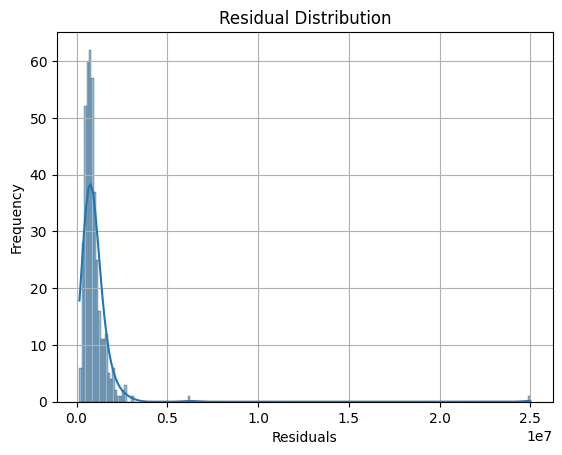

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


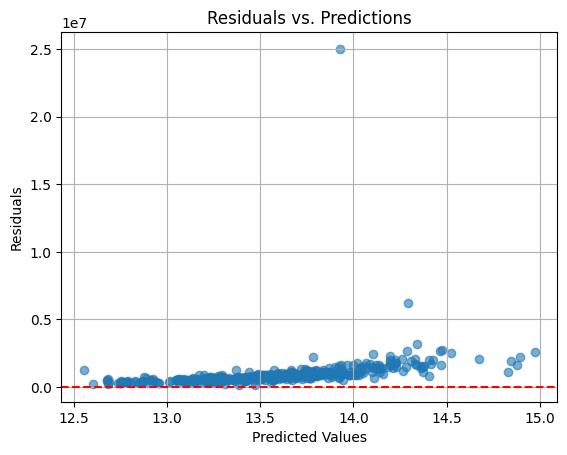

In [72]:
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predictions")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()


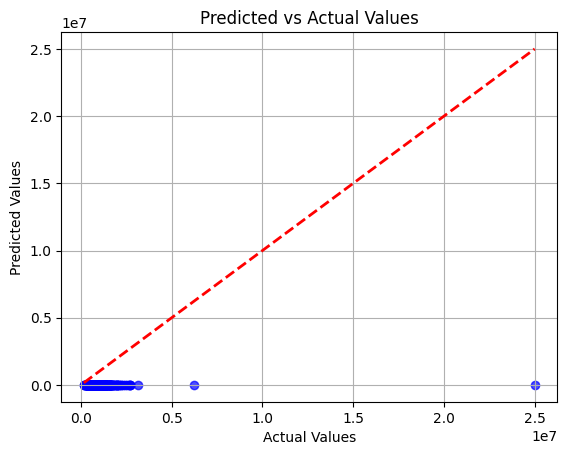

In [73]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle="--")
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


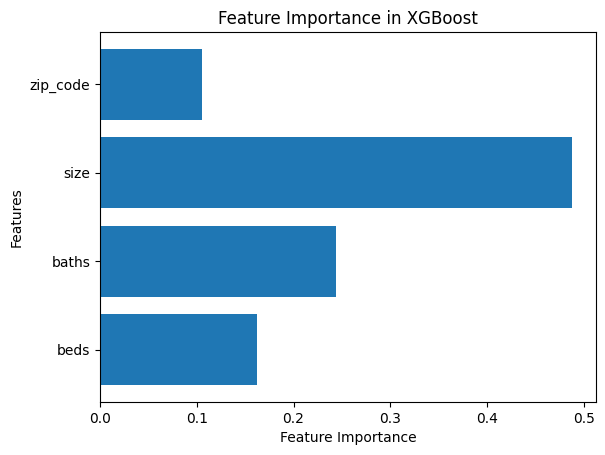

In [74]:
feature_importances = random_search.best_estimator_.named_steps['regressor'].feature_importances_

# Plot feature importances
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()


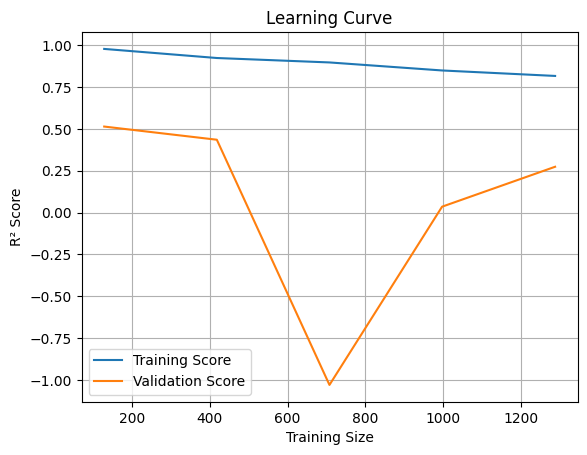

In [75]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    random_search.best_estimator_, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


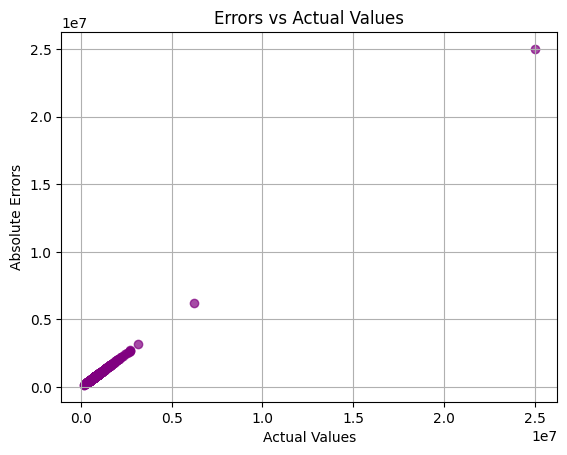

In [76]:
errors = np.abs(residuals)
plt.scatter(y_test, errors, alpha=0.7, color='purple')
plt.title("Errors vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Absolute Errors")
plt.grid()
plt.show()


In [78]:
config=read_yaml(CONFIG_FILE_PATH)

[2024-12-03 17:30:41,018 : INFO : common : YAML file C:\Users\bored\Music\My_own\config\config.yaml is loaded safely]


In [79]:
import pickle

def load_model(model_path):
    """Load the model from the given path."""
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    return model


In [80]:
import pandas as pd
import numpy as np

def predict(model, test_data_path):
    """Make predictions using the loaded model."""
    data = pd.read_csv(test_data_path)
    x_test = data.drop(columns=['price'])
    y_test = data['price']
    y_pred_log = model.predict(x_test)
    y_pred = np.expm1(y_pred_log)  # Inverse of log1p (if target was log-transformed)
    return x_test, y_test, y_pred


In [81]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error,
    explained_variance_score,
    mean_squared_log_error,
)

def calculate_metrics(y_test, y_pred, x_test):
    """Calculate regression metrics."""
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    smape = np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100
    median_ae = median_absolute_error(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    max_error = np.max(np.abs(y_test - y_pred))
    n = len(y_test)
    k = x_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    msle = mean_squared_log_error(y_test, y_pred)

    metrics = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "Adjusted R²": adjusted_r2,
        "MAPE": mape,
        "SMAPE": smape,
        "Median AE": median_ae,
        "Explained Variance": explained_variance,
        "Max Error": max_error,
        "MSLE": msle,
    }
    return metrics


In [91]:
metrics=calculate_metrics(y_pred=y_pred,y_test=y_test,x_test=x_test)

In [82]:
import pandas as pd

def save_metrics(metrics, file_path):
    """Save metrics to a CSV file."""
    df = pd.DataFrame(metrics, index=[0])
    df.to_csv(file_path, index=False)


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_residual_distribution(y_test, y_pred, save_path):
    residuals = y_test - y_pred
    plt.figure()
    sns.histplot(residuals, kde=True)
    plt.title("Residual Distribution")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.grid()
    plt.savefig(save_path, dpi=300)
    plt.close()


In [84]:
def plot_residuals_vs_predictions(y_pred, y_test, save_path):
    residuals = y_test - y_pred
    plt.figure()
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs. Predictions")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.grid()
    plt.savefig(save_path, dpi=300)
    plt.close()


In [89]:
CONFIG_FILE_PATH


WindowsPath('C:/Users/bored/Music/My_own/config/config.yaml')

In [ ]:
config=read_yaml(CONFIG_FILE_PATH)

In [87]:
model_validation=config.model_validation

In [88]:
load_model(model_validation.model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.6, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [92]:
score=model_validation.scores

In [95]:
metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])

In [96]:
save_file(metrics_df,model_validation.scores)

[2024-12-03 17:46:24,649 : INFO : common : File saved successfully at artifacts/model_validation/scores.csv]


In [99]:
def plots(y_pred=y_pred,y_test=y_test,x_test=x_test,x_train=X_train,model=loaded_model):
  plot_residuals_vs_predictions(y_pred, y_test, model_validation.ResidualsVSPredictions)
  plot_residual_distribution(y_test, y_pred, model_validation.ResidualDistribution)

In [100]:
plots()